In [ ]:
import numpy as np  # Para operações matemáticas e manipulação de arrays
import pandas as pd  # Para análise e manipulação de dados tabulares
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalização dos dados
from sklearn.pipeline import Pipeline  # Para organização sequencial de etapas de processamento
from sklearn.neural_network import MLPRegressor  # Implementação do regressor MLP
from sklearn.model_selection import train_test_split  # Para divisão treino/teste e validação cruzada
from sklearn import metrics  # Métricas de avaliação
import matplotlib.pyplot as plt  # Para criação de gráficos básicos
import seaborn as sns  # Para visualizações estatísticas mais avançadas
from google.colab import drive  # Para montagem do Google Drive
drive.mount('/content/drive')  # Monta o Google Drive no ambiente Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando os datasets e exibindo informações básicas (inclui um except pois está dando erro pra carregar arquivos no meu drive)
try:
    df_train = pd.read_csv('/content/drive/MyDrive/ressonanciaMLP.csv')  # Dados de treino
    df_test = pd.read_csv('/content/drive/MyDrive/ressonanciaMLPTest.csv')  # Dados de teste
except:
    print("Erro ao carregar arquivos. Verifique os caminhos ou faça upload manual:")
    from google.colab import files
    uploaded = files.upload()
    df_train = pd.read_csv('ressonanciaMLP.csv')
    df_test = pd.read_csv('ressonanciaMLPTest.csv')

print("\nInformações do Dataset de Treino:")
display(df_train.head())
print(f"\nDimensões: {df_train.shape}")

print("\nInformações do Dataset de Teste:")
display(df_test.head())
print(f"\nDimensões: {df_test.shape}")

Erro ao carregar arquivos. Verifique os caminhos ou faça upload manual:


Saving ressonanciaMLPTest.csv to ressonanciaMLPTest (2).csv
Saving ressonanciaMLP.csv to ressonanciaMLP (2).csv

Informações do Dataset de Treino:


,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316



Dimensões: (200, 4)

Informações do Dataset de Teste:


,x1,x2,x3,d
0,0.0611,0.2860,0.7464,0.4831
1,0.5102,0.7464,0.0860,0.5965
2,0.0004,0.6916,0.5006,0.5318
3,0.9430,0.4476,0.2648,0.6843
4,0.1399,0.1610,0.2477,0.2872



Dimensões: (20, 4)


In [ ]:
 #Separação em (X) e (y)
X_train = df_train[['x1', 'x2', 'x3']].values
y_train = df_train['d'].values
X_test = df_test[['x1', 'x2', 'x3']].values
y_test = df_test['d'].values

In [ ]:
# Hiperparâmetros fixos
learning_rate = 0.01
max_iter = 1000
random_state = 42

# Combinações a testar
configs = {
    'T1': {'neurons': 5, 'activation': 'tanh'},
    'T2': {'neurons': 5, 'activation': 'relu'},
    'T3': {'neurons': 5, 'activation': 'logistic'},
    'T4': {'neurons': 10, 'activation': 'tanh'},
    'T5': {'neurons': 10, 'activation': 'relu'},
    'T6': {'neurons': 10, 'activation': 'logistic'},
    'T7': {'neurons': 15, 'activation': 'tanh'},
    'T8': {'neurons': 15, 'activation': 'relu'},
    'T9': {'neurons': 15, 'activation': 'logistic'}
}


In [ ]:
# Loop de treinamento
results = []

for name, config in configs.items():
    print(f"\nTreinando {name}: {config['neurons']} neurônios, {config['activation']}")

    mlp = MLPRegressor(
        hidden_layer_sizes=(config['neurons'],),
        activation=config['activation'],
        learning_rate_init=learning_rate,
        max_iter=max_iter,
        random_state=random_state
    )

    mlp.fit(X_train, y_train)

    results.append({
        'Treinamento': name,
        'Neurônios': config['neurons'],
        'Ativação': config['activation'],
        'Perda Final': mlp.loss_,
        'Épocas': len(mlp.loss_curve_),
        'Modelo': mlp
    })


Treinando T1: 5 neurônios, tanh

Treinando T2: 5 neurônios, relu

Treinando T3: 5 neurônios, logistic

Treinando T4: 10 neurônios, tanh

Treinando T5: 10 neurônios, relu

Treinando T6: 10 neurônios, logistic

Treinando T7: 15 neurônios, tanh

Treinando T8: 15 neurônios, relu

Treinando T9: 15 neurônios, logistic


In [ ]:
# Tabela de resultados
results_df = pd.DataFrame(results).sort_values('Perda Final')
display(results_df[['Treinamento', 'Neurônios', 'Ativação', 'Perda Final', 'Épocas']])


,Treinamento,Neurônios,Ativação,Perda Final,Épocas
4,T5,10,relu,0.000613,65
7,T8,15,relu,0.000855,53
6,T7,15,tanh,0.001224,29
0,T1,5,tanh,0.001755,133
8,T9,15,logistic,0.016983,18
5,T6,10,logistic,0.020071,21
1,T2,5,relu,0.020925,75
2,T3,5,logistic,0.021387,35
3,T4,10,tanh,0.034849,22


In [ ]:
# Identificar melhor modelo
best_result = results_df.iloc[0]
best_mlp = best_result['Modelo']

print("\nMelhor configuração:")
print(f"Treinamento: {best_result['Treinamento']}")
print(f"Neurônios: {best_result['Neurônios']}")
print(f"Ativação: {best_result['Ativação']}")
print(f"Perda Final: {best_result['Perda Final']:.6f}")


Melhor configuração:
Treinamento: T5
Neurônios: 10
Ativação: relu
Perda Final: 0.000613


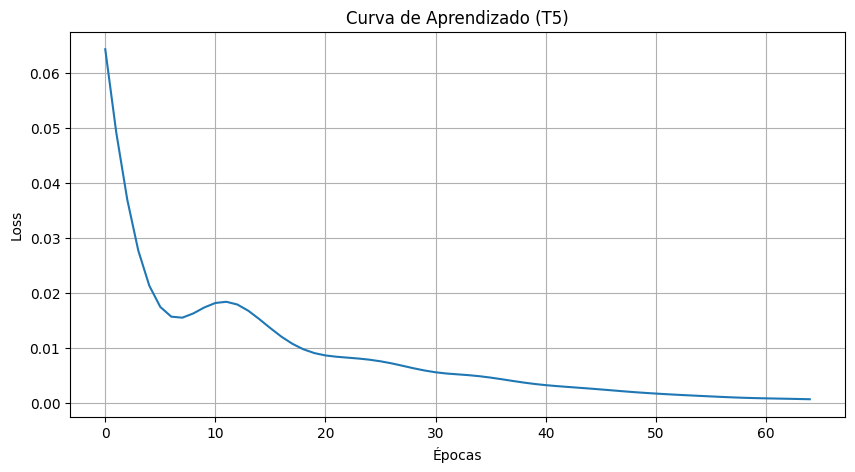

In [ ]:
# Gráfico da curva de perda
plt.figure(figsize=(10, 5))
plt.plot(best_mlp.loss_curve_)
plt.title(f"Curva de Aprendizado ({best_result['Treinamento']})")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig('loss_curve.png')  # Salvar para incluir no relatório
plt.show()

In [ ]:
y_pred = best_mlp.predict(X_test)

# Cálculo e impressão das métricas
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred), '# Variação de 0 ao infinito. Quanto menor, melhor.')
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred), '# Variação de 0 ao infinito. Quanto menor, melhor.')
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '# Variação de 0 ao infinito. Quanto menor, melhor.')
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred), '# Apresenta em porcentagem de erros em relação ao desejado.')
print('R2:', metrics.r2_score(y_test, y_pred), '# Representa quanto o modelo está prevendo corretamente, variação de 0 a 1. R2 = 1 indica relação linear perfeita.')

Mean Absolute Error (MAE): 0.02727779809450036 # Variação de 0 ao infinito. Quanto menor, melhor.
Mean Squared Error (MSE): 0.0010852879657537713 # Variação de 0 ao infinito. Quanto menor, melhor.
Root Mean Squared Error (RMSE): 0.03294370904670225 # Variação de 0 ao infinito. Quanto menor, melhor.
Mean Absolute Percentage Error (MAPE): 0.05116743266857328 # Apresenta em porcentagem de erros em relação ao desejado.
R2: 0.949714391173676 # Representa quanto o modelo está prevendo corretamente, variação de 0 a 1. R2 = 1 indica relação linear perfeita.


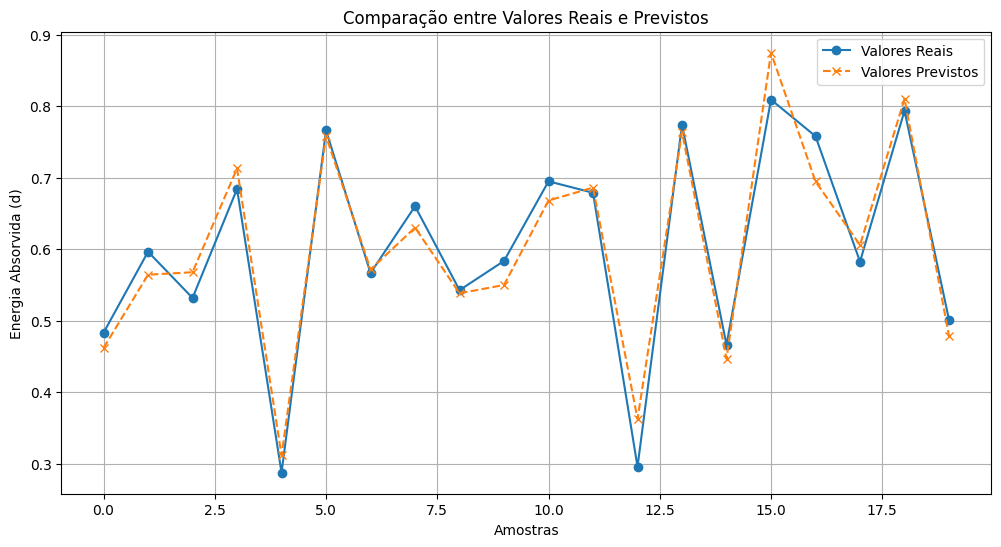

In [ ]:
# Gráfico de comparação
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'o-', label='Valores Reais')
plt.plot(y_pred, 'x--', label='Valores Previstos')
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Amostras")
plt.ylabel("Energia Absorvida (d)")
plt.legend()
plt.grid(True)
plt.savefig('comparison.png')  # Salvar para incluir no relatório
plt.show()

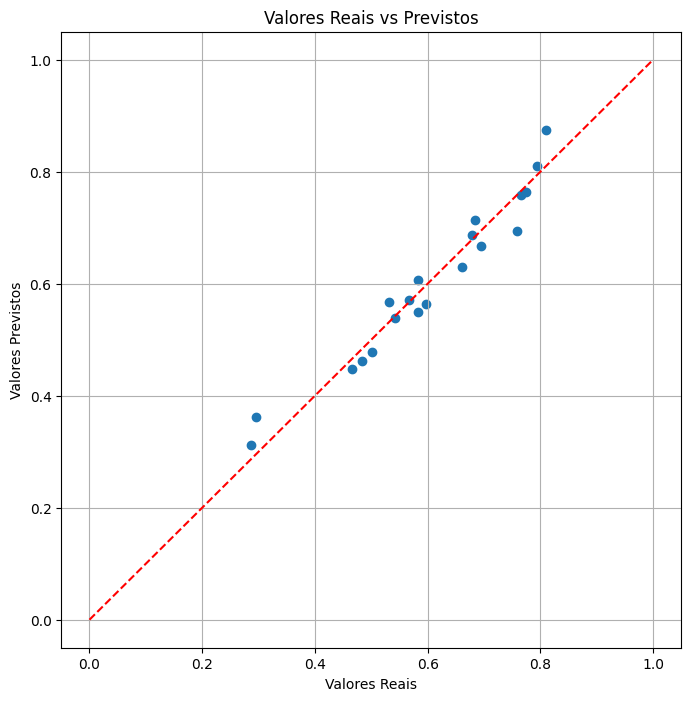

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Valores Reais vs Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.savefig('scatter.png')  # Salvar para incluir no relatório
plt.show()